**Problem Statement**

The problem here is to predict approximate prices of houses in city of bangalore.
The price of houses will be predicted on different factors like number of rooms, square of feet, area in which house is built etc.

This is similar problem which are present in websites like 99acres.com, magicbricks.com etc

Dataset

The dataset is taken from Kaggle
https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [43]:
!pip install catboost

     |████████████████████████████████| 65.9MB 44kB/s 


# Step 1 - Importing Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 2 - Importing the Dataset

In [2]:
raw_data = pd.read_csv('/content/drive/My Drive/Data Science Projects/Bengaluru_House_Data.csv')
raw_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
raw_data = raw_data.drop(['society', 'availability', 'balcony' , 'area_type'], axis=1) # Deleting some columns
raw_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [4]:
description = raw_data.describe(include ='all')
print(description)

          location   size total_sqft          bath         price
count        13319  13304      13320  13247.000000  13320.000000
unique        1305     31       2117           NaN           NaN
top     Whitefield  2 BHK       1200           NaN           NaN
freq           540   5199        843           NaN           NaN
mean           NaN    NaN        NaN      2.692610    112.565627
std            NaN    NaN        NaN      1.341458    148.971674
min            NaN    NaN        NaN      1.000000      8.000000
25%            NaN    NaN        NaN      2.000000     50.000000
50%            NaN    NaN        NaN      2.000000     72.000000
75%            NaN    NaN        NaN      3.000000    120.000000
max            NaN    NaN        NaN     40.000000   3600.000000


# Step 3 - Taking care of missing data

In [5]:
raw_data.isnull().sum()

raw_data = raw_data.dropna(axis=0)
raw_data = raw_data.reset_index(drop=True)

In [7]:
raw_data.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Step 4 - Dealing with size variable

In [8]:
raw_data['size'] = raw_data['size'].apply(lambda x: int(x.split(' ')[0])) #Keeping only the integer part from size
raw_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


# Step 5- Dealing with total_sqft variable

In [10]:
raw_data['total_sqft'].head(50)

0            1056
1            2600
2            1440
3            1521
4            1200
5            1170
6            2732
7            3300
8            1310
9            1020
10           1800
11           2785
12           1000
13           1100
14           2250
15           1175
16           1180
17           1540
18           2770
19           1100
20            600
21           1755
22           2800
23           1767
24            510
25           1250
26            660
27           1610
28           1151
29           1025
30    2100 - 2850
31           1075
32           1760
33           1693
34           1925
35            700
36           1070
37           1724
38           1290
39           1143
40           1296
41           1254
42            600
43            660
44        1330.74
45            600
46            970
47           1459
48            800
49            869
Name: total_sqft, dtype: object

In [13]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

raw_data[~raw_data['total_sqft'].apply(is_float)].head(20)  #Negate is used to reverse the result
# Here all the rows where total_sqft values can't be converted into float will be displayed.



,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
120,Hebbal,4,3067 - 8156,4.0,477.000
135,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
163,Sarjapur,2,1145 - 1340,2.0,43.490
186,KR Puram,2,1015 - 1540,2.0,56.800
406,Kengeri,1,34.46Sq. Meter,1.0,18.500
545,Hennur Road,2,1195 - 1440,2.0,63.770
642,Arekere,9,4125Perch,9.0,265.000
655,Yelahanka,2,1120 - 1145,2.0,48.130
665,Bettahalsoor,4,3090 - 5002,4.0,445.000


We can observe that total_sqft a lot of unusual values, for eg some are given in float while some values ar given in range. For values in range we will just take average of that range. For all other values we will convert them in float

In [14]:
# Below funcion will take average values for ranges
# For values which cant be converted to float will be droped
# All others will be converted to float

def sqft_to_num(x):  
  try:
    tokens = x.split('-')
    if(len(tokens) ==2):
      return (float(tokens[0])+ float(tokens[1]))/2
    return float(x)
  except:
    return None
  
raw_data['total_sqft'] = raw_data['total_sqft'].apply(sqft_to_num)  
raw_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [15]:
raw_data.head(50)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.00,2.0,39.07
1,Chikka Tirupathi,4,2600.00,5.0,120.00
2,Uttarahalli,3,1440.00,2.0,62.00
3,Lingadheeranahalli,3,1521.00,3.0,95.00
4,Kothanur,2,1200.00,2.0,51.00
5,Whitefield,2,1170.00,2.0,38.00
6,Old Airport Road,4,2732.00,4.0,204.00
7,Rajaji Nagar,4,3300.00,4.0,600.00
8,Marathahalli,3,1310.00,3.0,63.25
9,Gandhi Bazar,6,1020.00,6.0,370.00


# Step 6 - Creating another column price per square feet

In [16]:
raw_data['price_per_sqft'] = raw_data['price']*100000/raw_data['total_sqft']
raw_data.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


 # Step 7 - Dealing with location Variable 

In [17]:
raw_data['location'] = raw_data['location'].apply(lambda x: x.strip())

location_count=raw_data.groupby('location').location.count().sort_values(ascending=False) 
location_count = location_count[location_count<10]

raw_data['location'] = raw_data['location'].apply(lambda x: 'other' if x in location_count.index else x)

# Keeping only those locations which have atleast 10 rows rest all will be marked as 'other'

In [18]:
raw_data.head(20)

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
5,Whitefield,2,1170.0,2.0,38.00,3247.863248
6,Old Airport Road,4,2732.0,4.0,204.00,7467.057101
7,Rajaji Nagar,4,3300.0,4.0,600.00,18181.818182
8,Marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


# Step 8 - Visualizing and removing outliers

In [19]:
# Removing outliers where room size is less than 300 sqft

raw_data = raw_data[raw_data['total_sqft']/raw_data['size']>=300] 

In [20]:
# Remvoing where number of rooms are not equal or 1 less than bathrooms

raw_data = raw_data[raw_data['bath']<raw_data['size']+2] 

In [21]:
# Removing outliers based on price per square feet in a particular area

def remove_pps_outliers(data):  #Because mean and std price per sqft can vary according to location
  data_out = pd.DataFrame()     # pps is price per sqft
  
  for key, subdf in data.groupby('location'):
    mean = np.mean(subdf.price_per_sqft)
    sd = np.std(subdf.price_per_sqft)
    subdf = subdf[(subdf.price_per_sqft>(mean-sd)) & (subdf.price_per_sqft<=(mean+sd))]
    data_out = pd.concat([data_out, subdf], ignore_index = True)
  return data_out

raw_data = remove_pps_outliers(raw_data)

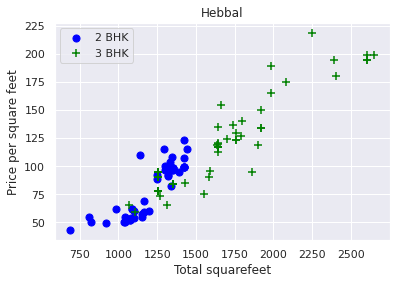

In [22]:
# Removing those outliers where price of of 2bhk is more than that of 3bhk in particular area

def plot_scatter_chart(df, location):
  size2 = df[(df['location']==location) & (df['size']==2)] 
  size3 = df[(df['location']==location) & (df['size']==3)]
  plt.scatter(size2.total_sqft, size2.price, color = 'blue', label = '2 BHK', s = 50)
#  plt.rcParams['figure.figsize'] = (15,10)
  plt.scatter(size3.total_sqft, size3.price, color = 'green', label = '3 BHK', s = 50, marker ='+')
  plt.xlabel('Total squarefeet')
  plt.ylabel('Price per square feet')
  plt.title(location)
  plt.legend()
  plt.show()
  
plot_scatter_chart(raw_data, 'Hebbal')

def remove_size_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    size_stats = {}
    for size , size_df in location_df.groupby('size'):
      size_stats[size] = {
                          'mean': np.mean(size_df.price_per_sqft),
                          'std': np.std(size_df.price_per_sqft),
                          'count':size_df.shape[0]
                          }
    for size, size_df in location_df.groupby('size'):
      stats = size_stats.get(size-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, size_df[size_df.price_per_sqft<(stats['mean'])].index.values)
  return  df.drop(exclude_indices , axis =0)

raw_data = remove_size_outliers(raw_data)

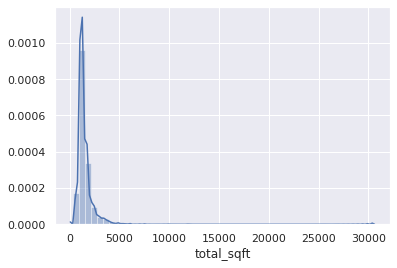

In [23]:
sb.distplot(raw_data['total_sqft'])

l = raw_data['total_sqft'].quantile(0.01)
h = raw_data['total_sqft'].quantile(0.99) #Getting upto 99percentile value from max 

raw_data = raw_data[raw_data['total_sqft']>= l]
raw_data = raw_data[raw_data['total_sqft']<= h]

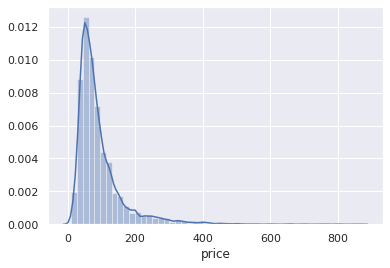

In [24]:
sb.distplot(raw_data['price'])

l = raw_data['price'].quantile(0.01)
h = raw_data['price'].quantile(0.99) #Getting upto 99percentile value from max 

raw_data = raw_data[raw_data['price']>= l]
raw_data = raw_data[raw_data['price']<= h]

raw_data = raw_data.drop(['price_per_sqft'], axis =1)
raw_data = raw_data.reset_index(drop=True)

In [25]:
raw_data.head(20)

,location,size,total_sqft,bath,price
0,1st Block Jayanagar,3,1630.0,3.0,194.0
1,1st Block Jayanagar,3,1875.0,2.0,235.0
2,1st Block Jayanagar,3,1200.0,2.0,130.0
3,1st Block Jayanagar,2,1235.0,2.0,148.0
4,1st Block Jayanagar,4,2450.0,4.0,368.0
5,1st Block Koramangala,2,1415.0,2.0,110.0
6,1st Block Koramangala,2,860.0,2.0,65.5
7,1st Block Koramangala,4,3000.0,3.0,300.0
8,1st Block Koramangala,3,2350.0,3.0,210.0
9,1st Phase JP Nagar,3,1875.0,3.0,167.0


In [26]:
# Step 9 - Dividng dataset into Independent and Dependent Variables

Y = raw_data.iloc[:, -1]    #Dependent Variable should be a Series
X = raw_data.iloc[:, :-1]

In [27]:
X.head()

,location,size,total_sqft,bath
0,1st Block Jayanagar,3,1630.0,3.0
1,1st Block Jayanagar,3,1875.0,2.0
2,1st Block Jayanagar,3,1200.0,2.0
3,1st Block Jayanagar,2,1235.0,2.0
4,1st Block Jayanagar,4,2450.0,4.0


In [28]:
Y.head()

0    194.0
1    235.0
2    130.0
3    148.0
4    368.0
Name: price, dtype: float64

# Step 10 - Getting list of all the columns in a list

In [29]:
location_count = raw_data.groupby('location').location.count() 
location_df = pd.DataFrame(data = location_count.index, columns = ['location'])
othercols = list(X.columns.values)[1:]
othercols_df = pd.DataFrame(data = othercols, columns = ['location'])
cols_df = pd.concat([location_df, othercols_df], axis=0)
all_cols = list(cols_df['location'].values)

In [30]:
print(all_cols)

['1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar', '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura', 'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar', 'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele', 'BEML Layout', 'BTM 1st Stage', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya', 'Badavala Nagar', 'Balagere', 'Banashankari', 'Banashankari Stage II', 'Banashankari Stage III', 'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi', 'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road', 'Basapura', 'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur', 'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar', 'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli', 'Bommanahalli', 'Bommasandra', 'Bommasandra Industrial Area', 'Bommenah

# Step 11 - Diving dataset into Training and Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Step 12 - One hot Encoding categorical data using columntransformer

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(), [0])] , remainder = 'passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

# Step 13 - Checking accuracy of different machine learning models

In [34]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, Y_train)

[16:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [64]:
from catboost import CatBoostRegressor
regressor = CatBoostRegressor()
regressor.fit(X_train, Y_train)

Learning rate set to 0.053035
0:	learn: 57.2178496	total: 3.11ms	remaining: 3.1s
1:	learn: 55.2328314	total: 5.54ms	remaining: 2.77s
2:	learn: 53.4027794	total: 7.98ms	remaining: 2.65s
3:	learn: 51.6547551	total: 10.4ms	remaining: 2.6s
4:	learn: 50.0594050	total: 12.9ms	remaining: 2.56s
5:	learn: 48.5025166	total: 15.2ms	remaining: 2.52s
6:	learn: 47.0216544	total: 17.8ms	remaining: 2.52s
7:	learn: 45.7187777	total: 20.3ms	remaining: 2.51s
8:	learn: 44.5454022	total: 22.8ms	remaining: 2.51s
9:	learn: 43.3366224	total: 25.2ms	remaining: 2.5s
10:	learn: 42.1928873	total: 27.5ms	remaining: 2.48s
11:	learn: 41.1242449	total: 30.3ms	remaining: 2.49s
12:	learn: 40.1617907	total: 32.8ms	remaining: 2.49s
13:	learn: 39.2913843	total: 35.2ms	remaining: 2.48s
14:	learn: 38.4895682	total: 37.6ms	remaining: 2.47s
15:	learn: 37.7652976	total: 39.9ms	remaining: 2.45s
16:	learn: 37.0029628	total: 42.3ms	remaining: 2.44s
17:	learn: 36.3136723	total: 44.6ms	remaining: 2.43s
18:	learn: 35.6660276	total: 

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [51]:
from sklearn.linear_model import Lasso
regressor = Lasso()
regressor = regressor.fit(X_train, Y_train)

# Step 14 - Predicting Test Set results and checking accuracy of models

In [65]:
yhat = regressor.predict(X_test)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = Y_train, cv = 5)

from sklearn.metrics import r2_score, mean_squared_error
accuracy = r2_score(Y_test, yhat)
mse = mean_squared_error(Y_test, yhat)

print("Mean Accuracy " , accuracies.mean())
print("Test Accuracy", accuracy)
print("Mean Squared Error ", mse)

Streaming output truncated to the last 5000 lines.
8:	learn: 44.9105973	total: 26.9ms	remaining: 2.96s
9:	learn: 43.7015186	total: 31.5ms	remaining: 3.12s
10:	learn: 42.6170085	total: 33.8ms	remaining: 3.04s
11:	learn: 41.5394342	total: 36.2ms	remaining: 2.98s
12:	learn: 40.5797250	total: 38.9ms	remaining: 2.95s
13:	learn: 39.6896390	total: 41.7ms	remaining: 2.94s
14:	learn: 38.8861777	total: 44.1ms	remaining: 2.9s
15:	learn: 38.1405838	total: 46.6ms	remaining: 2.87s
16:	learn: 37.4118475	total: 49ms	remaining: 2.83s
17:	learn: 36.7214212	total: 51.5ms	remaining: 2.81s
18:	learn: 36.0546248	total: 53.7ms	remaining: 2.77s
19:	learn: 35.4868519	total: 56.1ms	remaining: 2.75s
20:	learn: 34.8893112	total: 58.5ms	remaining: 2.73s
21:	learn: 34.3287351	total: 60.8ms	remaining: 2.7s
22:	learn: 33.8333873	total: 63.1ms	remaining: 2.68s
23:	learn: 33.3374461	total: 65.1ms	remaining: 2.65s
24:	learn: 32.7776237	total: 67.4ms	remaining: 2.63s
25:	learn: 32.3186403	total: 69.6ms	remaining: 2.61s
2

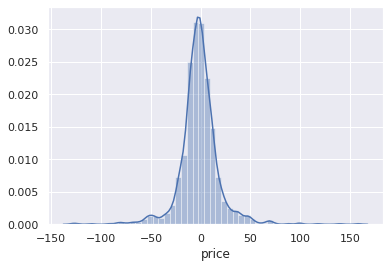

In [66]:
sb.distplot(Y_test-yhat) # It should be a normal distribution


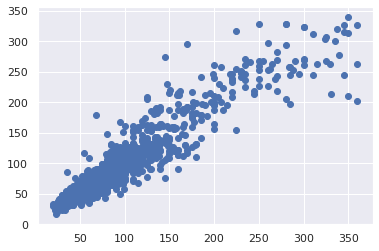

In [67]:
plt.scatter(Y_test, yhat) # it should be close to linear


# Step 15 - Predicting for a single row or data

In [68]:
def get_predicted_value(location, size, total_sqft, bath):
  len_columns = len(all_cols)
  x = np.zeros(len_columns)
  x[-3] = size
  x[-2] = total_sqft
  x[-1] = bath

  try:
    loc_index = all_cols.index(location)
    if(loc_index>=0):
      x[loc_index] = 1
  except:
    x[-4] =1
  
  x = np.array(x).reshape((1,-1))

  return regressor.predict(x)

print(get_predicted_value('other', 3, 1200, 2))

# Prices are in lakhs

[86.85509525]


# Step 16 - Saving model and columns data for future use

In [69]:
import pickle
with open ('banglore house price prediction.pickle', 'wb') as file:
  pickle.dump(regressor, file)
  
import json
columns = {
          'data_columns' : [col.lower() for col in all_cols]
    }
with open('columns.json', 'w') as file:
  file.write(json.dumps(columns))

**Conclusion**

Comparing accuracies of different models

**XGBoost**

Mean Accuracy  0.8334473137886329
Test Accuracy 0.8350460196516805
Mean Squared Error  576.3929532231713

**CatBoost**

Mean Accuracy  0.8777337309577747
Test Accuracy 0.8797642508573706
Mean Squared Error  420.13559409102515

**Random Forest**

Mean Accuracy  0.838524714336093
Test Accuracy 0.8553647557037809
Mean Squared Error  505.39390091717706

**Lasso**

Mean Accuracy  0.726466276094449
Test Accuracy 0.7237578391437439
Mean Squared Error  965.2633696044655

As can be seen catboost is a clear winner in detecting the prices of houses in different areas of banglore given by factors like size, bathrooms, square feet and aread.
The accuracy of our final model is 88% approx.

